## Análisis de la Homocedasticidad y Heterocedasticidad 

### El objetivo es identificar si existe diferencia entre la varianza del peso de hombres y mujeres.

In [8]:
import pandas as pd 

URL = ('https://raw.githubusercontent.com/JoaquinAmatRodrigo/'+
'Estadistica-machine-learning-python/master/data/Howell1.csv')

datos = pd.read_csv(URL)
print(datos)


      height     weight   age  male
0    151.765  47.825606  63.0     1
1    139.700  36.485807  63.0     0
2    136.525  31.864838  65.0     0
3    156.845  53.041914  41.0     1
4    145.415  41.276872  51.0     0
..       ...        ...   ...   ...
539  145.415  31.127751  17.0     1
540  162.560  52.163080  31.0     1
541  156.210  54.062497  21.0     0
542   71.120   8.051258   0.0     1
543  158.750  52.531624  68.0     1

[544 rows x 4 columns]


In [9]:
print(datos.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   height  544 non-null    float64
 1   weight  544 non-null    float64
 2   age     544 non-null    float64
 3   male    544 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 17.1 KB
None


## Convirtiendo la columna male a  cadena

In [12]:
datos['male']=datos['male'].astype(str)

print(datos.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   height  544 non-null    float64
 1   weight  544 non-null    float64
 2   age     544 non-null    float64
 3   male    544 non-null    object 
dtypes: float64(3), object(1)
memory usage: 17.1+ KB
None


## Filtrando datos por edades mayor de 15

In [13]:
datos = datos[(datos.age > 15)]
print(datos)

      height     weight   age male
0    151.765  47.825606  63.0    1
1    139.700  36.485807  63.0    0
2    136.525  31.864838  65.0    0
3    156.845  53.041914  41.0    1
4    145.415  41.276872  51.0    0
..       ...        ...   ...  ...
537  142.875  34.246196  31.0    0
539  145.415  31.127751  17.0    1
540  162.560  52.163080  31.0    1
541  156.210  54.062497  21.0    0
543  158.750  52.531624  68.0    1

[372 rows x 4 columns]


### Obteniendo la serie de dato pesos hombres

In [14]:
pesos_hombres = datos.loc[datos.male=='1','weight']
print(pesos_hombres)


0      47.825606
3      53.041914
5      62.992589
7      55.479971
9      54.487739
         ...    
528    47.882306
532    41.050076
539    31.127751
540    52.163080
543    52.531624
Name: weight, Length: 174, dtype: float64


## Obteniendo la serie de datos pesos mujeres

In [39]:
pesos_mujeres = datos.loc[datos.male=='0','weight']
print(pesos_mujeres)

1      36.485807
2      31.864838
4      41.276872
6      38.243476
8      34.869885
         ...    
529    39.405805
533    40.823280
534    47.031821
537    34.246196
541    54.062497
Name: weight, Length: 198, dtype: float64


## Aplicando la gráfica Violinplot

Text(0, 0.5, 'Sexo')

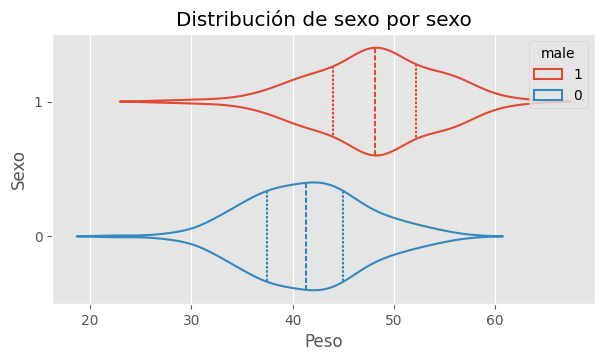

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(7,3.5))
sns.violinplot(
    x='weight',
    y='male',
    data=datos,
    hue='male',    
    fill=False, 
    inner="quart",
    native_scale=True,
    legend='full',
    ax =ax
)
ax.set_title('Distribución de sexo por sexo')
ax.set_xlabel('Peso')
ax.set_ylabel('Sexo')


## Graficando con BoxPlot

Text(0, 0.5, 'Sexo')

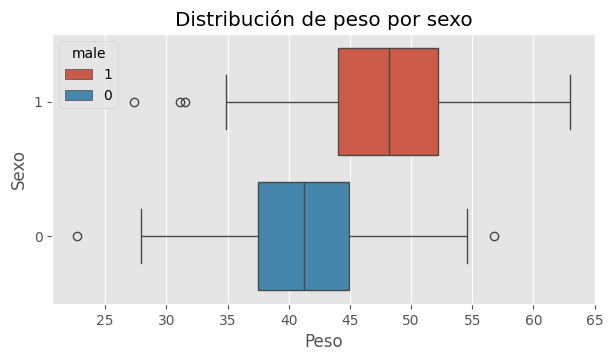

In [34]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 3.5))
sns.boxplot(
  x='weight',
  y='male',
  data=datos,
  legend=True,
  hue='male',
  ax=ax
)
ax.set_title("Distribución de peso por sexo")
ax.set_xlabel("Peso")
ax.set_ylabel("Sexo")

## Testiando con métodos estadísticos (Métodos de test de hipótesis para comparar varianzas)

La hipótesis nula es que existe  homocedasticidad. Es decir, que los datos proceden de distribuciones con la misma varianza.

### Test de Levene  (Cuando no sabemos si los datos viene de distribuciones normales)

In [42]:
from scipy import stats

levene_test= stats.levene(pesos_hombres, pesos_mujeres, center='median')
levene_test


LeveneResult(statistic=0.18630521976263306, pvalue=0.6662611053126026)

## interpretación de resultados

Como el valor de p_value es es menor a 0.05 se rechaza la homocedasticidad
Cuando menor sea el estadístico F(Statistic) mas probable es que las medias son iguales

### Barlet Test (Datos que  vienen de una distribución normal)

In [45]:
barlet_test= stats.bartlett(pesos_hombres, pesos_mujeres)
barlet_test

BartlettResult(statistic=0.8473322751459793, pvalue=0.3573081212488608)

### Interpretación de resultados

El pvalue es menor que 0.35 es mayor que 0.05 lo cual significa que los datos tienen heterocedasticidad.
Cuando menor sea el estadístico F(Statistic) mas probable es que las medias son iguales


###  Test de Fligner (No paramétrio)

In [51]:
test_fligner= stats.fligner(pesos_hombres,pesos_mujeres,center='median')
test_fligner

FlignerResult(statistic=0.1376531343594324, pvalue=0.7106253515287645)

### Interpretación de resultados

Como el p-value es mayor que 0.7 que 0.05 entonces exite heterocedasticidad en los datos.
Cuando menor sea el estadístico F(Statistic) mas probable es que las medias son iguales